# CAMS data analysis

This notebook will walk us trough the steps to acces, analyze and visualize CAMS model data using mwcs. 

### Access to single products

This section will show you how to retrieve global CAMS data for a specific time and plot it

The first step is to import all necessary packages

In [8]:
import geopandas as gpd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import adampy as adam

In order to retrieve an image we have to define the collection and time range and call the function we just created. We have four different collections, uncheck the one you want to use:

In [9]:
#collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
collection = 'Z_CAMS_C_ECMF_PM10'

time_t = '2019-08-01T00:00:00,2019-08-01T23:59:59'
image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, fname = 'outputs/cams_global.tif').get_data()

In [11]:
metadata

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 9.969209968386869e+36,
 'width': 900,
 'height': 451,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.39999999999999997, 0.0, -180.199997,
        0.0, -0.39999999999999997, 90.2),
 'offset': 0.0,
 'scale': 1.0}

Then, we open the image and apply a small offset for correct visualization

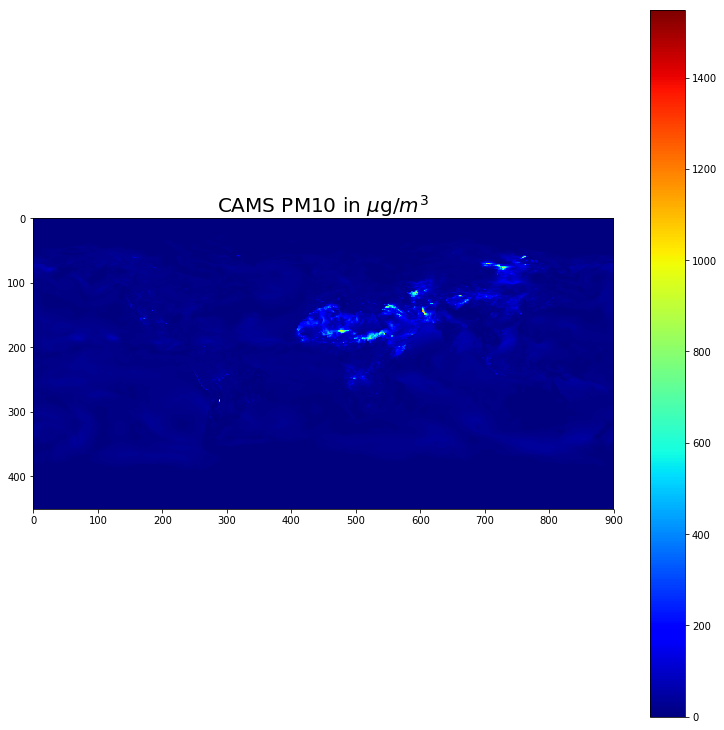

In [12]:
plt.subplots(figsize=(13,13))
plt.imshow(image, cmap = 'jet')
plt.colorbar()
if collection == 'Z_CAMS_C_ECMF_PM10':
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-1]), size=20)
else:
    plt.title(r'CAMS {} in kg/$m^2$'.format(collection.split('_')[-1]), size=20)

You can also "zoom in" into a specific area using the image coordinates (not the geographic coordinates)

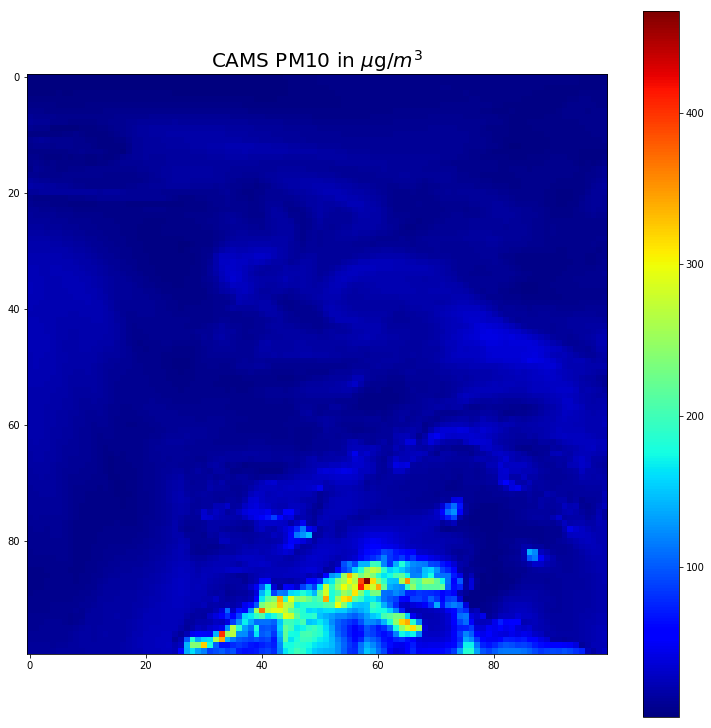

In [23]:
plt.subplots(figsize=(13,13))
plt.imshow(image[50:150,400:500], cmap = 'jet')
plt.colorbar()
if collection == 'Z_CAMS_C_ECMF_PM10':
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-1]), size=20)
else:
    plt.title(r'CAMS {} in kg/$m^2$'.format(collection.split('_')[-1]), size=20)

### Geographic subset

We might be interested in analyzing just a particular area

As before, let's define the minimum and maximum longitude and latitude, collection and time range, and call the new function

In [24]:
#define bbox
max_lat = 65
min_lat = 30

max_long = 40
min_long = -20

#collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
collection = 'Z_CAMS_C_ECMF_PM10'
time_t = '2019-04-01T00:00:00,2019-04-01T23:59:59'

image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, min_lat, max_lat, min_long, max_long,fname = 'outputs/cams_subset.tif').get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-04-01T00:00:00,2019-04-01T23:59:59)&format=image/tiff&filter=false&CoverageId=Z_CAMS_C_ECMF_PM10&subset=Lat(30,65)&subset=Long(-20,40)&token=None&scale=1


Then, we open the image and apply a small offset for a correct visualization

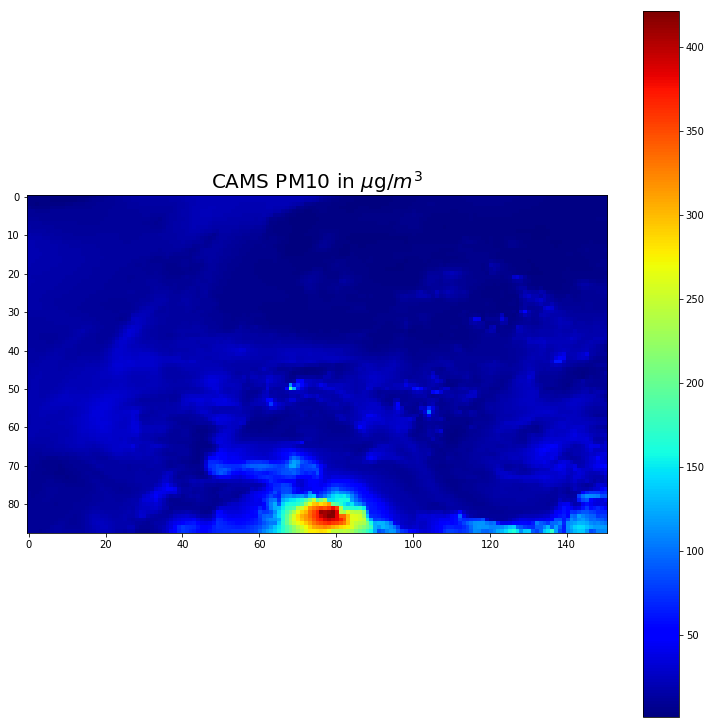

In [25]:
plt.subplots(figsize=(13,13))
plt.imshow(image, cmap = 'jet')
plt.colorbar()
if collection == 'Z_CAMS_C_ECMF_PM10':
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-1]), size=20)
else:
    plt.title(r'CAMS {} in kg/$m^2$'.format(collection.split('_')[-1]), size=20)

### Single point time series

Another analysis we can do is to retrieve a time series for a specific location.

We define the coordinates, collection and time range and call the new function

In [26]:
lat = 40
long = 2
#collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
collection = 'Z_CAMS_C_ECMF_PM10'
time_t = '2019-07-12T00:00:00,2019-07-31T23:59:59'

data, times = adam.getTimeSeries('wcs.top-platform.eu', collection,time_t, lat, long).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-07-12T00:00:00,2019-07-31T23:59:59)&format=application/xml&CoverageId=Z_CAMS_C_ECMF_PM10&subset=Lat(40)&subset=Long(2)&filter=false&token=None


Once we got the data we just need to plot it:

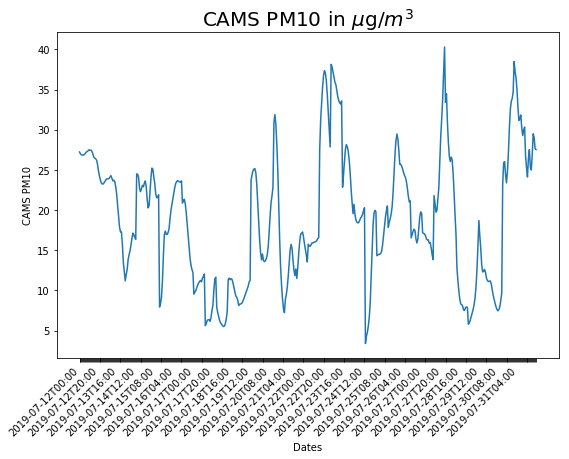

In [30]:
f, ax = plt.subplots(figsize=(9, 6))
plt.plot(times,data)

ax.set(xlabel='Dates', ylabel='CAMS {}'.format(collection.split('_')[-1]))

n = 20  # Keeps every 20th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

if collection == 'Z_CAMS_C_ECMF_PM10':
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-1]), size=20)
else:
    plt.title(r'CAMS {} in kg/$m^2$'.format(collection.split('_')[-1]), size=20)

### Subset using a polygon

We might want to get data over a specific polygon. In this case we will get NO2 CAMS data over the African continent. First, we need a polygon with the shape of the African continent. In this case the file is in geojson format but also KML and SHP can be loaded.

In [31]:
df = gpd.read_file('data/Africa.geojson')
df.head()

,geometry
0,"(POLYGON ((11.737519 -16.692578, 11.738507 -16..."


Let's have a quick look at it

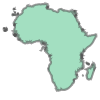

In [32]:
geom = df['geometry'][0]
geom

As usual, we define the collection and time range, and call the new function

In [33]:
collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
#collection = 'Z_CAMS_C_ECMF_PM10'
time_t = '2019-04-01T00:00:00,2019-04-01T23:59:59'

image, metadata = adam.getImage('wcs.top-platform.eu', collection, time_t, fname = 'outputs/polygon_test.tif', geometry = "data/Africa.geojson", masking = True).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-04-01T00:00:00,2019-04-01T23:59:59)&format=image/tiff&filter=false&CoverageId=Z_CAMS_C_ECMF_TCNO2&subset=Lat(-34.821954,37.345201)&subset=Long(-25.360422,51.417038)&token=None&scale=1


And now we can plot the masked image

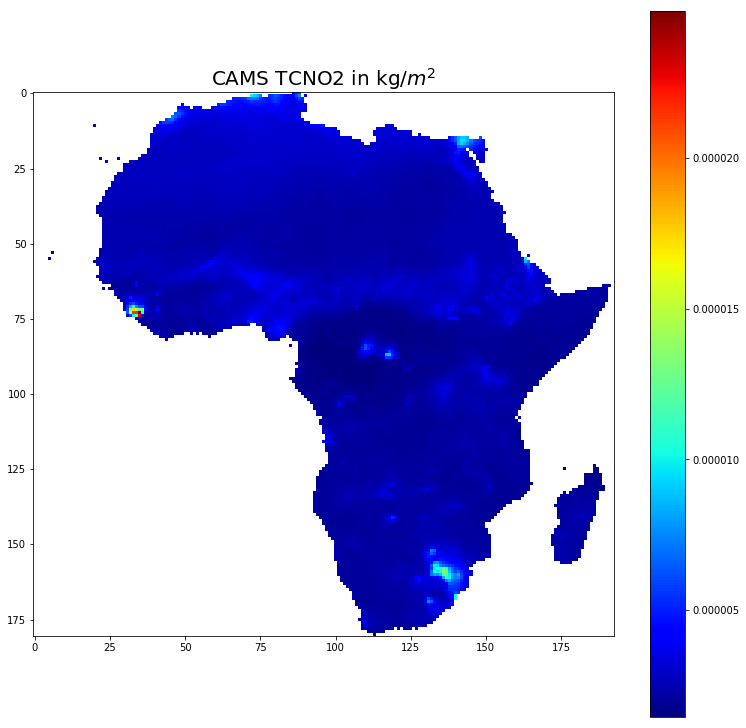

In [34]:
plt.subplots(figsize=(13,13))
plt.imshow(image, cmap = 'jet')
plt.colorbar()
if collection == 'Z_CAMS_C_ECMF_PM10':
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-1]), size=20)
else:
    plt.title(r'CAMS {} in kg/$m^2$'.format(collection.split('_')[-1]), size=20)

### Automatic time averages

One of the most interesting things we can have with CAMS data is to look at NO2 animations for a time range. This new function will take a start and end date and create an animated gif.

In [36]:
start_date = date(2019, 5, 1)
end_date = date(2019, 5, 15)
collection = 'Z_CAMS_C_ECMF_TCNO2'
#collection = 'Z_CAMS_C_ECMF_TCSO2'
#collection = 'Z_CAMS_C_ECMF_GTCO3'
#collection = 'Z_CAMS_C_ECMF_PM10'
gif = adam.getAnimation('wcs.top-platform.eu', collection, start_date, end_date, frame_duration = 0.1, legend = False).get_data()


In [ ]:
gif = adam.getAnimation('wcs.top-platform.eu', 'Z_CAMS_C_ECMF_TCNO2', date(2019, 5, 1), date(2019, 5, 15), frame_duration = 0.1, legend = False).get_data()


Once all the hourly images are downloaded we can created and visualize the GIF

In [37]:
from IPython.display import Image
Image(url=gif)

## Exercise

* Try to use a different collection and adjust the values in the legend (adding vmax = value). You can also use a different time range.
* Get a geojson or shapefile of a country of your choice and run the polygon analysis. You can get it from https://data.opendatasoft.com/explore/dataset/european-union-countries@public/export/